In [1]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau



# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [2]:
df1=pd.read_csv('E:/cryptics/dataset/Banana.csv')

In [3]:
df1

,sn,name,price
0,1,Banana,43.0
1,2,Banana,45.0
2,3,Banana,45.0
3,4,Banana,45.0
4,5,Banana,45.0
...,...,...,...
3599,3600,Banana,125.0
3600,3601,Banana,130.0
3601,3602,Banana,130.0
3602,3603,Banana,130.0


In [4]:
closedf1 = df1[['sn','price']]
print("Shape of close dataframe:", closedf1.shape)

Shape of close dataframe: (3604, 2)


In [5]:
del closedf1['sn']
scaler1=MinMaxScaler(feature_range=(0,1))
closedf=scaler1.fit_transform(np.array(closedf1).reshape(-1,1))
print(closedf1.shape)

(3604, 1)


In [6]:
training_size1=int(len(closedf1)*0.70)
test_size1=len(closedf1)-training_size1
train_data1,test_data1=closedf1[0:training_size1,:],closedf1[training_size1:len(closedf1),:1]
print("train_data: ", train_data1.shape)
print("test_data: ", test_data1.shape)

train_data:  (2522, 1)
test_data:  (1082, 1)


In [7]:
def create_dataset1(dataset1, time_step1=1):
    dataX1, dataY1 = [], []
    for i in range(len(dataset1)-time_step1-1):
        a1 = dataset1[i:(i+time_step1), 0]   ###i=0, 0,1,2,3-----99   100
        dataX1.append(a1)
        dataY1.append(dataset1[i + time_step1, 0])
    return np.array(dataX1), np.array(dataY1)
time_step1 = 30
X_train1, y_train1 = create_dataset1(train_data1, time_step1)
X_test1, y_test1 = create_dataset1(test_data1, time_step1)

print("X_train: ", X_train1.shape)
print("y_train: ", y_train1.shape)
print("X_test: ", X_test1.shape)
print("y_test", y_test1.shape)

X_train:  (2491, 30)
y_train:  (2491,)
X_test:  (1051, 30)
y_test (1051,)


In [8]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train1 =X_train1.reshape(X_train1.shape[0],X_train1.shape[1] , 1)
X_test1 = X_test1.reshape(X_test1.shape[0],X_test1.shape[1] , 1)

print("X_train: ", X_train1.shape)
print("X_test: ", X_test1.shape)

X_train:  (2491, 30, 1)
X_test:  (1051, 30, 1)


In [9]:
model1=Sequential()

model1.add(LSTM(128,input_shape=(None,1),activation="relu"))

model1.add(Dense(1))

model1.compile(loss="mean_squared_error",optimizer="adam")

c:\Users\itssh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [10]:
#early stopping and model checking

#Early Stopping
earlystop1 = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.001,         #Abs value and is the main change required before we stop
                          mode='auto',
                          patience = 6,             #no of epocs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keep the best weigts once stopped
#Model Checkpoint
checkpoint1 = ModelCheckpoint(monitor = "val_loss",
                             mode ='auto',
                             filepath = "E:/cryptics/dataset/best_model_banana.keras",
                             verbose = 1,
                             save_best_only = True,
                             )

#Reduce learning Rate

reduce_lr1 = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.01,
                              patience = 6,
                              verbose = 1,
                              min_delta = 0.001)


# we put our call backs into a callback list
callback1 = [earlystop1, checkpoint1,reduce_lr1]

In [11]:
history1 = model1.fit(X_train1,y_train1,validation_data=(X_test1,y_test1),callbacks=callback1,epochs=220,batch_size=32,verbose=1)

Epoch 1/220
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0019
Epoch 1: val_loss improved from inf to 0.00141, saving model to E:/cryptics/dataset/best_model_banana.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0019 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 2/220
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0011
Epoch 2: val_loss did not improve from 0.00141
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0011 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 3/220
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.6199e-04
Epoch 3: val_loss did not improve from 0.00141
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.7855e-04 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 4/220
76/78 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0010
Epoch 4: val_loss improved from 0.00141 to 0.00067, saving model to E:/cryptics/dataset/best_model_banana.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0010 - val_loss: 6.7048e-04 - learning_rate: 0.0010
Epoch 5/220
77

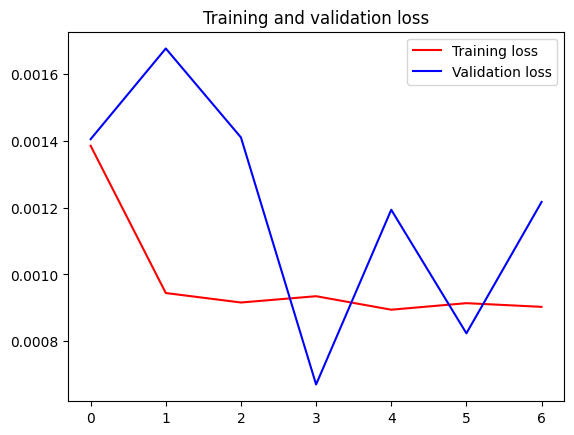

<Figure size 640x480 with 0 Axes>

In [12]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs1 = range(len(loss))

plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [13]:
### Lets Do the prediction and check performance metrics
train_predict1=model1.predict(X_train1)
test_predict1=model1.predict(X_test1)
train_predict1.shape, test_predict1.shape

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


((2491, 1), (1051, 1))

In [14]:
train_predict1 = scaler1.inverse_transform(train_predict)
test_predict1 = scaler1.inverse_transform(test_predict1)
original_ytrain1 = scaler1.inverse_transform(y_train1.reshape(-1,1))
original_ytest1 = scaler1.inverse_transform(y_test1.reshape(-1,1))

In [15]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain1,train_predict1)))
print("Train data MSE: ", mean_squared_error(original_ytrain1,train_predict1))
print("Train data MAE: ", mean_absolute_error(original_ytrain1,train_predict1))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest1,test_predict1)))
print("Test data MSE: ", mean_squared_error(original_ytest1,test_predict1))
print("Test data MAE: ", mean_absolute_error(original_ytest1,test_predict1))

Train data RMSE:  15.177040360747629
Train data MSE:  230.3425541117625
Train data MAE:  6.094037478219931
-------------------------------------------------------------------------------------
Test data RMSE:  18.076091156125685
Test data MSE:  326.74507148456524
Test data MAE:  15.697281422710326


In [16]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain1, train_predict1))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest1, test_predict1))

Train data explained variance regression score: 0.44415499993578067
Test data explained variance regression score: 0.8151820832131265


In [17]:
print("Train data R2 score:", r2_score(original_ytrain1, train_predict1))
print("Test data R2 score:", r2_score(original_ytest1, test_predict1))

Train data R2 score: 0.4058127559667165
Test data R2 score: 0.3110387877719474


In [18]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain1, train_predict1))
print("Test data MGD: ", mean_gamma_deviance(original_ytest1, test_predict1))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain1, train_predict1))
print("Test data MPD: ", mean_poisson_deviance(original_ytest1, test_predict1))

Train data MGD:  0.01585469024443213
Test data MGD:  0.01993135198654644
----------------------------------------------------------------------
Train data MPD:  1.70122468826183
Test data MPD:  2.531931292231355


In [19]:
import seaborn as sns

look_back1=time_step1
trainPredictPlot1 = np.empty_like(closedf1)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[look_back1:len(train_predict1)+look_back1, :] = train_predict1
print("Train predicted data: ", trainPredictPlot1.shape)

# shift test predictions for plotting
testPredictPlot1 = np.empty_like(closedf1)
testPredictPlot1[:, :] = np.nan
testPredictPlot1[len(train_predict1)+(look_back1*2)+1:len(closedf1)-1, :] = test_predict1
print("Test predicted data: ", testPredictPlot1.shape)

# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 6))

# names = cycle(['Original close price', 'Train predicted close price', 'Test predicted close price'])
# colors = cycle(['blue', 'orange', 'green'])

# for col in ['original_close', 'train_predicted_close', 'test_predicted_close']:
#     plt.plot(plotdf['date'], plotdf[col], label=next(names), color=next(colors))

# plt.xlabel('Date')
# plt.ylabel('Stock price')
# plt.title('Comparison between Google Stock original close price vs Google Stock predicted close price')
# plt.xticks(rotation=45)
# plt.legend()

# plt.tight_layout()
# plt.show()


Train predicted data:  (3604, 1)
Test predicted data:  (3604, 1)


In [20]:
x_input1=test_data1[len(test_data1)-time_step1:].reshape(1,-1)
temp_input1=list(x_input1)
temp_input1=temp_input1[0].tolist()

from numpy import array

lst_output1=[]
n_steps1=time_step1
i=0
pred_days1 = 30    # Prediction for next 30 days

while(i<pred_days1):

    if(len(temp_input1)>time_step1):

        x_input1=np.array(temp_input1[1:])
        #print("{} day input {}".format(i,x_input))
        x_input1 = x_input1.reshape(1,-1)
        x_input1 = x_input1.reshape((1, n_steps1, 1))

        yhat1 = model1.predict(x_input1, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input1.extend(yhat1[0].tolist())
        temp_input1=temp_input1[1:]
        #print(temp_input)

        lst_output1.extend(yhat1.tolist())
        i=i+1

    else:

        x_input1 = x_input1.reshape((1, n_steps1,1))
        yhat1 = model1.predict(x_input1, verbose=0)
        temp_input1.extend(yhat1[0].tolist())

        lst_output1.extend(yhat1.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output1))

Output of predicted next days:  30


In [21]:
last_days1=np.arange(1,time_step1+1)
day_pred1=np.arange(time_step+1,time_step1+pred_days1+1)
print(last_days1)
print(day_pred1)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60]


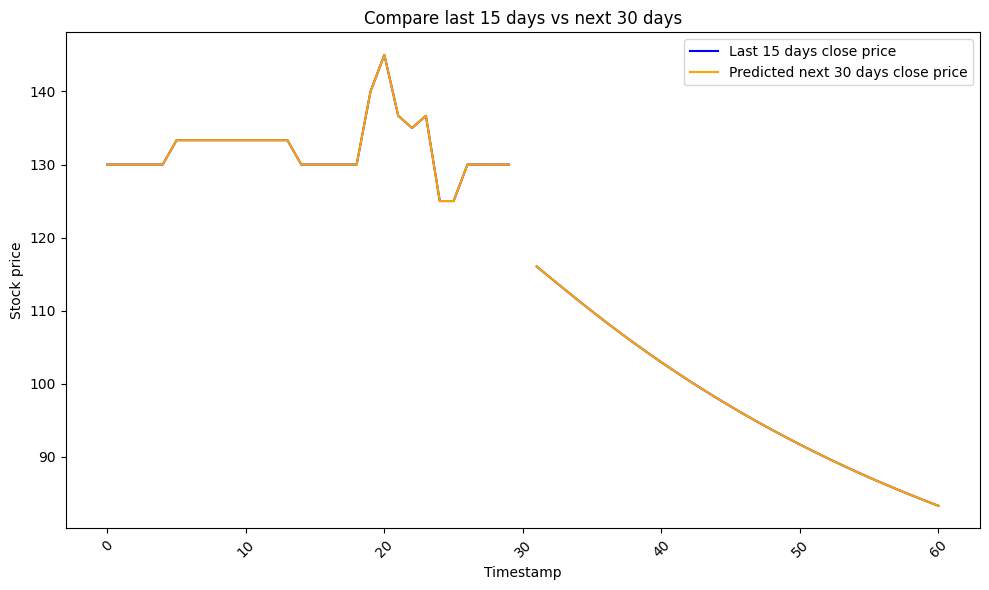

In [22]:
temp_mat1 = np.empty((len(last_days1)+pred_days1+1,1))
temp_mat1[:] = np.nan
temp_mat1 = temp_mat1.reshape(1,-1).tolist()[0]

last_original_days_value1 = temp_mat1
next_predicted_days_value1 = temp_mat1

last_original_days_value1[0:time_step1+1] = scaler1.inverse_transform(closedf1[len(closedf1)-time_step1:]).reshape(1,-1).tolist()[0]
next_predicted_days_value1[time_step1+1:] = scaler1.inverse_transform(np.array(lst_output1).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot1 = pd.DataFrame({
    'last_original_days_value':last_original_days_value1,
    'next_predicted_days_value':next_predicted_days_value1
})

names1 = cycle(['Last 15 days close price','Predicted next 30 days close price'])


# Assuming you have new_pred_plot DataFrame with necessary columns

plt.figure(figsize=(10, 6))

names1 = cycle(['Last 15 days close price', 'Predicted next 30 days close price'])
colors1 = cycle(['blue', 'orange'])

for col in ['last_original_days_value', 'next_predicted_days_value']:
    plt.plot(new_pred_plot1.index, new_pred_plot1[col], label=next(names1), color=next(colors1))

plt.xlabel('Timestamp')
plt.ylabel('Stock price')
plt.title('Compare last 15 days vs next 30 days')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


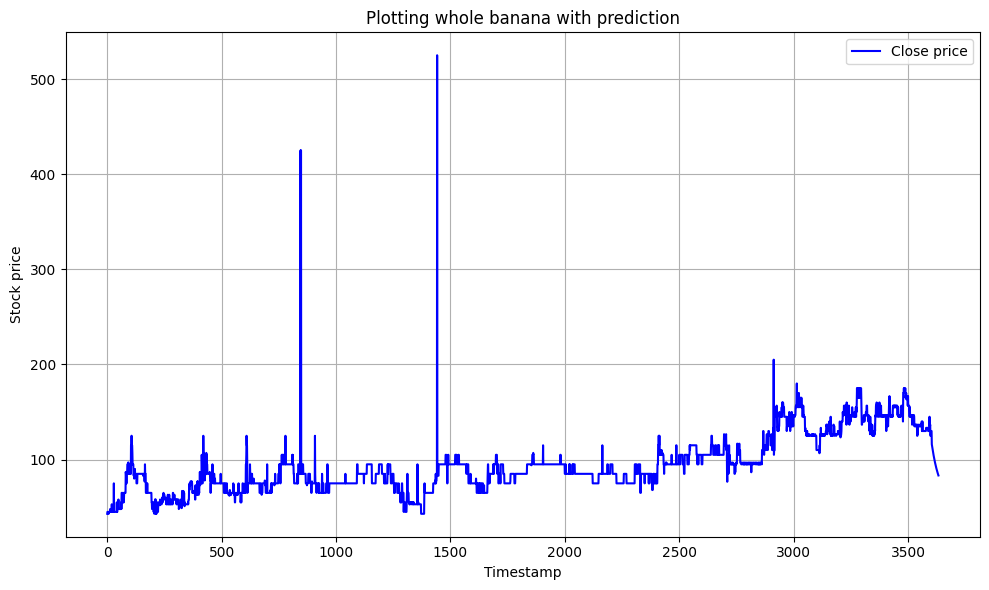

In [23]:
lstmdf1=closedf1.tolist()
lstmdf1.extend((np.array(lst_output1).reshape(-1,1)).tolist())
lstmdf=scaler1.inverse_transform(lstmdf1).reshape(1,-1).tolist()[0]

names1 = cycle(['Close price'])


# Assuming you have lstmdf list of stock prices

plt.figure(figsize=(10, 6))

names1 = cycle(['Close price'])
colors1 = cycle(['blue'])

plt.plot(lstmdf1, label=next(names1), color=next(colors1))

plt.xlabel('Timestamp')
plt.ylabel('Stock price')
plt.title('Plotting whole banana with prediction')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


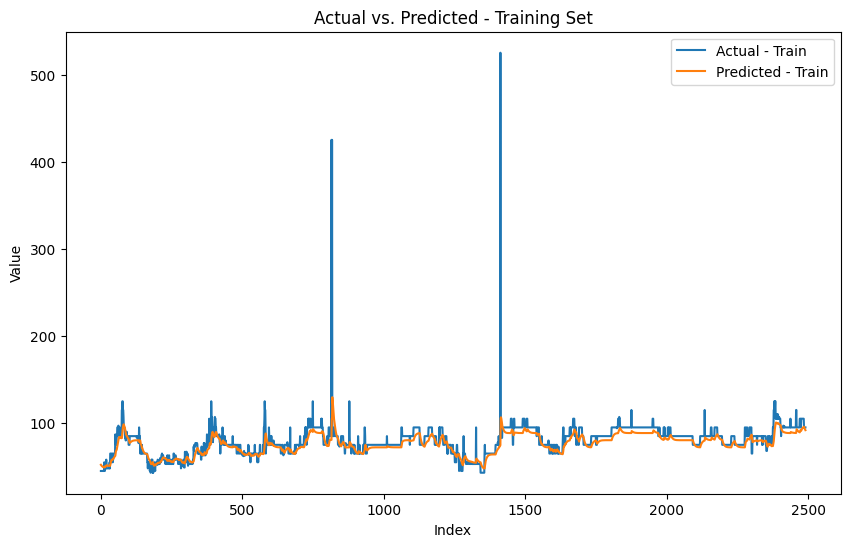

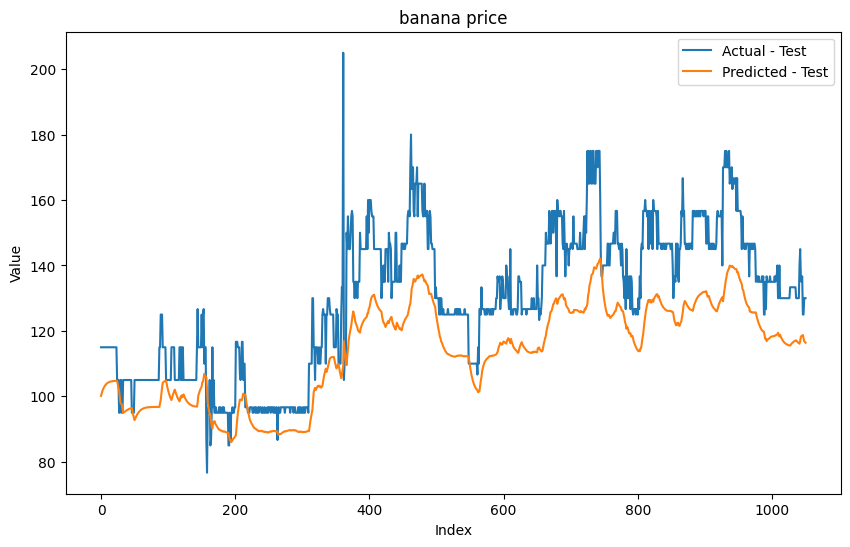

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(original_ytrain1, label='Actual - Train')
plt.plot(train_predict1, label='Predicted - Train')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted - Training Set')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(original_ytest1, label='Actual - Test')
plt.plot(test_predict1, label='Predicted - Test')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('banana price')
plt.legend()
plt.show()


In [25]:
print(next_predicted_days_value1[:30])
print(len(next_predicted_days_value1))
current1 = df1.iloc[len(df1)-1]
yesterday1 = df1.iloc[len(df1)-2]


[130.0, 130.0, 130.0, 130.0, 130.0, 133.33, 133.33, 133.33, 133.33, 133.33, 133.33, 133.33, 133.33, 133.33, 130.0, 130.0, 130.0, 130.0, 130.0, 140.0, 145.0, 136.67, 135.0, 136.67, 125.00000000000001, 125.00000000000001, 130.0, 130.0, 130.0, 130.0]
61


In [26]:
predictedprices=next_predicted_days_value1[:30]

In [28]:
from flask import Flask, jsonify
from flask_cors import CORS

app = Flask(__name__)
CORS(app)

print(predictedprices)
@app.route('/getBananaValues', methods=['GET'])
def get_Bananass_values():
    # Ensure there are at least 3 values in the predicted_prices array
    if len(predictedprices) >= 3:
        banana_data = {
            "name": "Banana",
            "currentPrice": current[-1],
            "yesterdayPrice": yesterday[-1],
            "tomorrowPrice": predictedprices[0],
            "description": "This is Banana",
            "locality": "Nepali",
        }
        return jsonify(banana_data)
    else:
        return jsonify({"error": "Not enough data available"}), 404

if __name__ == '__main__':
    app.run(port=27333)

[130.0, 130.0, 130.0, 130.0, 130.0, 133.33, 133.33, 133.33, 133.33, 133.33, 133.33, 133.33, 133.33, 133.33, 130.0, 130.0, 130.0, 130.0, 130.0, 140.0, 145.0, 136.67, 135.0, 136.67, 125.00000000000001, 125.00000000000001, 130.0, 130.0, 130.0, 130.0]
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:27334
Press CTRL+C to quit
127.0.0.1 - - [10/Mar/2024 19:58:16] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [10/Mar/2024 19:58:16] "GET /favicon.ico HTTP/1.1" 404 -
C:\Users\itssh\AppData\Local\Temp\ipykernel_2252\2472195959.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\itssh\AppData\Local\Temp\ipykernel_2252\2472195959.py:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

127.0.0.1 - - [10/Mar/2024 19:58:25] "GET /getBananaValues HTTP/1.1" 200 -
